In [215]:
import numpy as np
import scipy

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.image import img_to_graph, grid_to_graph
import networkx as nx

from matplotlib.pyplot import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, gaussian_filter
import skimage




Text(0.5, 1.0, 'mask overlayed image')

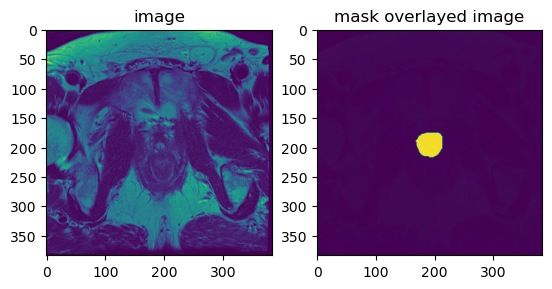

In [216]:

n = 4

im = imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/ProstateX/Processed/p0000slice{n}.png').astype(float)
mask = imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/ProstateX/Masks/p0000slice{n}.png').astype(float)


# im = imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Processed/p46slice{n}.png').astype(float)

# mask = imread(rf'/Users/liamjeske/Documents/GitHub/GraphsProject/LITS/Masks/p46slice{n}.png').astype(float)

mask[mask > 0.6] = 1

#imshow(mask, alpha=0.3)

fig, ax = plt.subplots(1,2)

ax[0].imshow(im)
ax[0].set_title("image")

ax[1].imshow(im)
ax[1].imshow(mask, alpha=0.95)
ax[1].set_title("mask overlayed image")


In [217]:
import pandas as pd

mask.flatten()[mask.flatten() > 0]

array([1., 1., 1., ..., 1., 1., 1.])

In [218]:
im.shape

(384, 384)

In [219]:
def downsample(img_array, downsample=20):
    # first, change to 0-1
    ds_array = img_array / np.max(img_array)
    return skimage.measure.block_reduce(ds_array[:, :],
                                    (downsample, downsample),
                                    np.mean)

oim = im          
df = 10
im = downsample(im,df)
ms = downsample(mask,df)

In [220]:
im

array([[0.0105098 , 0.01560784, 0.01501961, ..., 0.00341176, 0.00266667,
        0.        ],
       [0.01058824, 0.01411765, 0.01592157, ..., 0.01141177, 0.00580392,
        0.        ],
       [0.00866667, 0.01027451, 0.0682353 , ..., 0.16592157, 0.06690196,
        0.        ],
       ...,
       [0.04227451, 0.04360784, 0.04478431, ..., 0.07388235, 0.03972549,
        0.        ],
       [0.05239216, 0.06803922, 0.07235294, ..., 0.04643137, 0.0354902 ,
        0.        ],
       [0.00466667, 0.01376471, 0.02333333, ..., 0.        , 0.        ,
        0.        ]])

In [221]:
im.max(), im.min()

(0.6649411964416504, 0.0)

matrix([[0.0105098 , 0.00509804, 0.        , ..., 0.        , 0.        ,
         0.        ]])

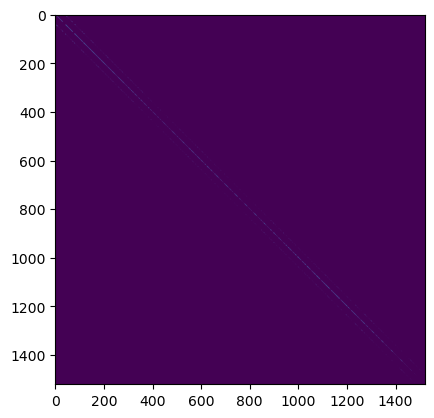

In [222]:
am = img_to_graph(im)
g = nx.Graph(am)

plt.imshow(am.todense())

am.todense().flatten()

In [223]:
am

<1521x1521 sparse matrix of type '<class 'numpy.float64'>'
	with 7449 stored elements in COOrdinate format>

In [224]:
np.array(list(dict(nx.degree(g)).values())).max()



6

In [225]:
nlm = nx.laplacian_matrix(g)


<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [226]:
nlm.shape

(1521, 1521)

/var/folders/tk/zc236kjd0lj90p065scg35t40000gn/T/ipykernel_96491/636467786.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  am = nx.adjacency_matrix(g).todense()


Text(0.5, 1.0, 'Weight Distribution in Image Graph')

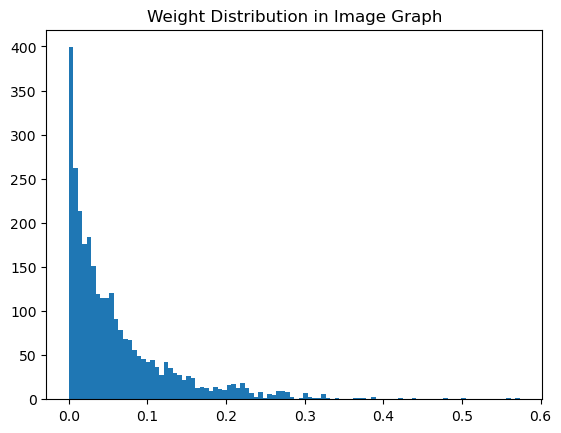

In [227]:
am = nx.adjacency_matrix(g).todense()
temp = np.tril(am,-1).flatten()
temp = temp[temp!=0]

plt.hist(temp, 100)
plt.title("Weight Distribution in Image Graph")

In [228]:
import graphviz

am[am<1e-3] = 0
temp = np.tril(am,-1).flatten()
temp = temp[temp!=0]

plt.hist(temp)
plt.title("Weight Distribution in Image Graph")

g = nx.Graph(am)

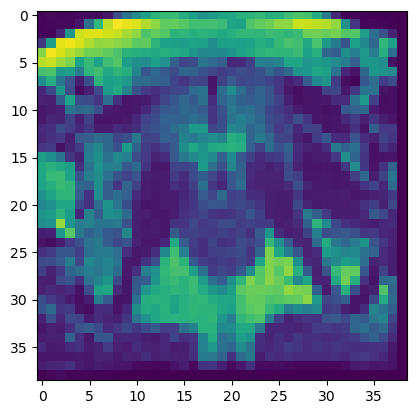

In [229]:
imshow(im)

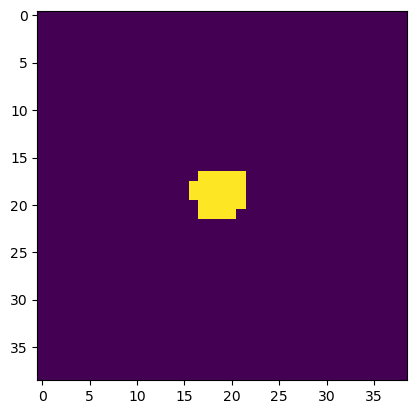

In [230]:
ms[ms>0] = 1
ms = ms.astype(int)
plt.imshow(ms)

In [231]:
ms.shape

(39, 39)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/var/folders/tk/zc236kjd0lj90p065scg35t40000gn/T/ipykernel_96491/3707560401.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  am = nx.adjacency_matrix(g)


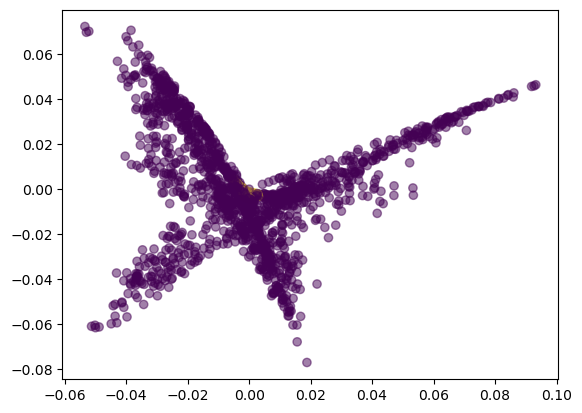

In [232]:
lm = nx.normalized_laplacian_matrix(g)
am = nx.adjacency_matrix(g)


a, b = scipy.sparse.linalg.eigs(lm, 6, which='SR')

a = np.real(a)
b = np.real(b)


new_data = b[:,1:3].T
plt.scatter(*new_data, c=ms.flatten(), alpha=0.5)

(-0.04, 0.04)

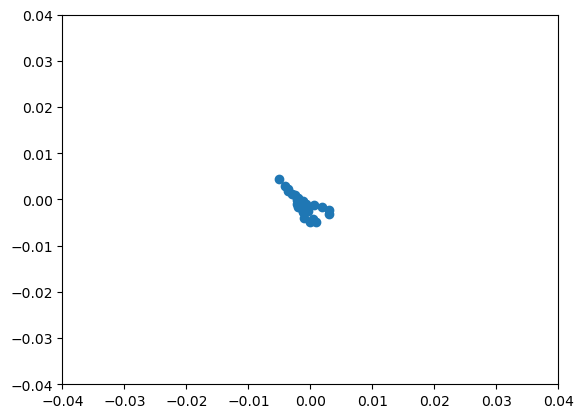

In [233]:
inds = ms.flatten() == 1

plt.scatter(new_data[0][inds], new_data[1][inds])
plt.xlim(-0.04, 0.04)
plt.ylim(-0.04, 0.04)

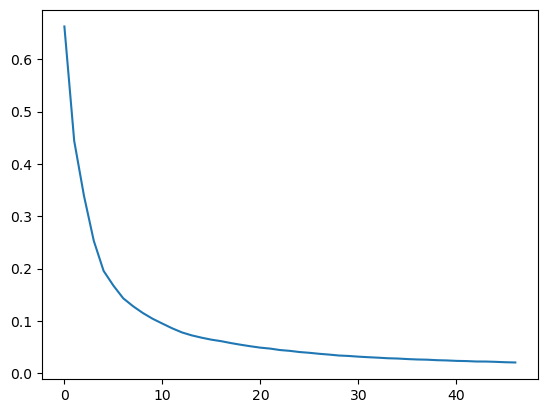

In [234]:
from sklearn.cluster import KMeans
tt = []
for i in range(3,50, 1):
    km = KMeans(i, n_init=20)
    km.fit(new_data.T)
    tt.append(km.inertia_)

plt.plot(tt)

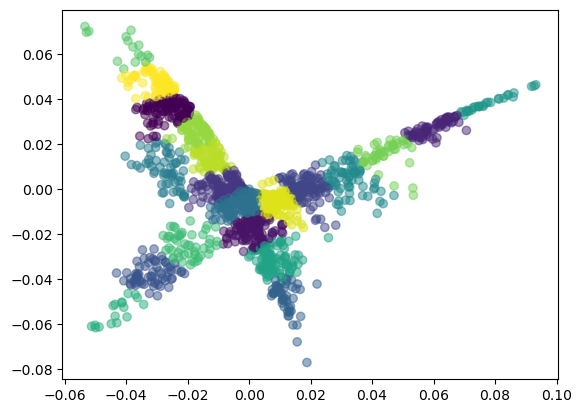

In [235]:
km = KMeans(20, n_init=20)
km.fit(new_data.T)

plt.scatter(*new_data, c=km.labels_, alpha=0.5)

In [236]:
im.shape

(39, 39)

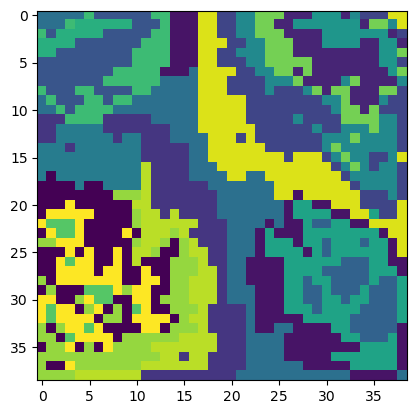

In [237]:
plt.imshow(km.labels_.reshape(im.shape))

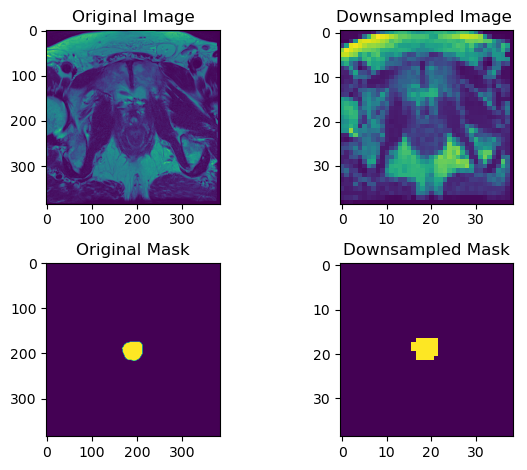

In [238]:
fig, ax = plt.subplots(2,2)
ax.flatten()[0].imshow(oim)
ax[0][0].set_title("Original Image")

ax.flatten()[1].imshow(im)
ax[0][1].set_title("Downsampled Image ")

ax[1][0].imshow(mask)
ax[1][0].set_title("Original Mask")

ax[1][1].imshow(ms)
ax[1][1].set_title("Downsampled Mask")
plt.tight_layout()



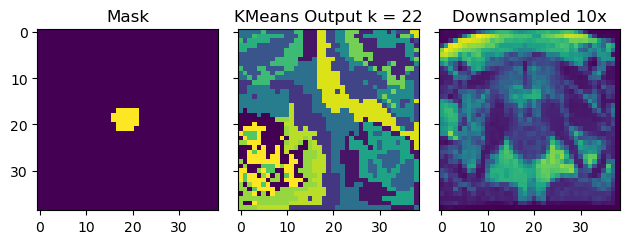

In [239]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True)
ax[0].imshow(ms)
ax[0].set_title("Mask")
ax[1].imshow(km.labels_.reshape(im.shape))
ax[1].set_title("KMeans Output k = 22")

ax[2].imshow(im)
ax[2].set_title("Downsampled 10x")

plt.tight_layout()

Text(0.5, 1.0, 'KMeans Zoomed k = 22')

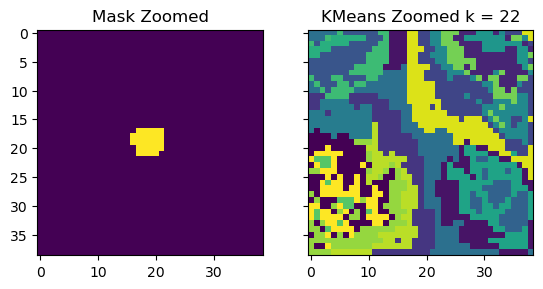

In [240]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
ax[0].imshow(ms)
ax[0].set_title("Mask Zoomed")
ax[1].imshow(km.labels_.reshape(im.shape))
ax[1].set_title("KMeans Zoomed k = 22")



In [241]:
ms.flatten().shape, ms[ms==0].shape

((1521,), (1495,))

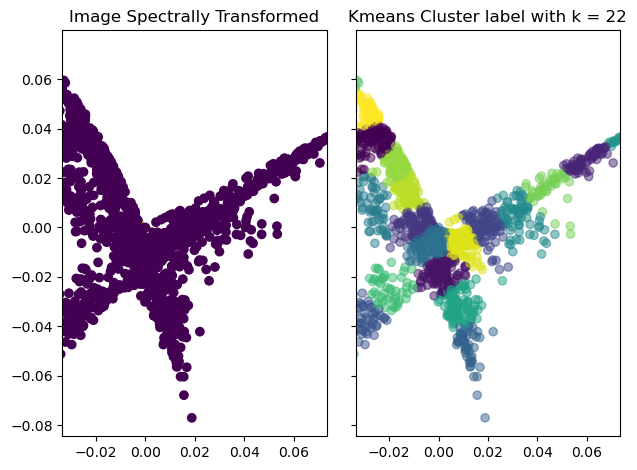

In [242]:
fig, ax = plt.subplots(1,2, sharey=True)
plt.axis('square')

inds = ms.flatten()!=0

newx, newy = new_data

ax[0].scatter(newx, newy, c=ms.flatten())
ax[0].set_title("Image Spectrally Transformed")
ax[0].axis('equal')
ax[1].scatter(*new_data, c=km.labels_, alpha=0.5)
ax[1].set_title("Kmeans Cluster label with k = 22")
ax[1].axis('equal')

plt.tight_layout()

In [243]:
ms.shape, b.shape

((39, 39), (1521, 6))

In [244]:
np.random.choice(ms.flatten(), )

0

In [245]:
new_data

array([[-5.21009225e-03, -6.27143536e-03, -5.34030306e-03, ...,
         3.10458108e-03,  2.73217695e-03, -3.19744231e-14],
       [-6.38122777e-03, -7.67169343e-03, -6.58797054e-03, ...,
        -1.54580283e-02, -1.36590645e-02, -3.93018951e-14]])

In [246]:
import tensorflow as tf
from tensorflow import keras


b.shape

(1521, 6)

from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(b, ms.flatten())


tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

                               tf.keras.layers.Dense(6, activation = 'relu'), #we may right it "tf.keras.activations.relu" too

                               tf.keras.layers.Dense(6, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'relu')

])

model_4.compile( loss= tf.keras.losses.binary_crossentropy,

                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),

                metrics = ['accuracy'])

model_4.fit(X_train, y_train, epochs = 2000, verbose = 0, class_weight={1:0.999, 0:1-0.001})
model_4.evaluate(X_test, y_test, return_dict=True)

out = model_4.predict(X_test)



plt.hist(out)

metrics.roc_curve(y_test, out.reshape())


sv = SVC(class_weight='balanced')

sv.fit(X_train, y_train)



metrics.precision_score(y_test, )

import igraph as ig

graph = ig.Graph(edges=g.edges)
layout = graph.layout("lgl")
ig.plot(graph, layout=layout)
#ig.plot(ig.Graph(edges=g.edges()))


1. Do spectral embedding of image
2. center the result of the projection (maybe scale too)
3. Train traditional ML classifier

In [247]:
import os

os.listdir()

['TrainUNet.py',
 'lits_test.txt',
 'ProstateDataset.py',
 'TransformerNet.py',
 'EvaluationHelpers.py',
 'ProstateX',
 'lits_fold_4.txt',
 'prostate_fold_4.txt',
 'UNET.py',
 'EfficientGraphSegmentation.py',
 'prostate_fold_3.txt',
 'lits_fold_3.txt',
 'lits_fold_2.txt',
 'prostate_fold_2.txt',
 'prostate_fold_0.txt',
 'CSDS600.ipynb',
 'lits_fold_0.txt',
 'lits_fold_1.txt',
 'prostate_fold_1.txt',
 'vit.py',
 'TrainingHelpers.py',
 '.gitignore',
 'ProcessProstateRaw.py',
 '.ipynb_checkpoints',
 'LITS',
 'prostate_test.txt',
 'BaseDICOM',
 '.git',
 'LITSDataset.py',
 'ProcessLITSRaw.py']

In [248]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

class DownsamplingTransformer(TransformerMixin):
    
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y):
        pass

    def transform(self, X):
        return downsample()

    

In [2]:
import os

os.listdir()

['TrainUNet.py',
 'lits_test.txt',
 'ProstateDataset.py',
 'TransformerNet.py',
 'Untitled-1.ipynb',
 'EvaluationHelpers.py',
 'ProstateX',
 'lits_fold_4.txt',
 'prostate_fold_4.txt',
 'UNET.py',
 'EfficientGraphSegmentation.py',
 'prostate_fold_3.txt',
 'lits_fold_3.txt',
 'lits_fold_2.txt',
 'prostate_fold_2.txt',
 'prostate_fold_0.txt',
 'CSDS600.ipynb',
 'lits_fold_0.txt',
 'lits_fold_1.txt',
 'prostate_fold_1.txt',
 'vit.py',
 'TrainingHelpers.py',
 '.gitignore',
 'AGCN.py',
 'ProcessProstateRaw.py',
 '.ipynb_checkpoints',
 'LITS',
 'prostate_test.txt',
 'BaseDICOM',
 '.git',
 'LITSDataset.py',
 'ProcessLITSRaw.py']